In [14]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # Compute distances and get the indices of the k closest neighbors
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in indices]

        # Majority vote: Find the most common class label
        most_common_label, _ = Counter(k_nearest_labels).most_common(1)[0]

        return most_common_label
  

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder


data=pd.read_csv('Q1Data.csv')
selected_features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6','MFCCs_ 7','MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13','MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19','MFCCs_20', 'MFCCs_21']
X = data[selected_features]
Y= data['Genus']
le = LabelEncoder()
Y = le.fit_transform(Y)
X = X.to_numpy()

knn= KNN(k=5)
knn.fit(X,Y)
y_pred = knn.predict(X)
acc = np.sum(y_pred == Y)/len(Y)
print(acc)




0.9911049339819319


## B

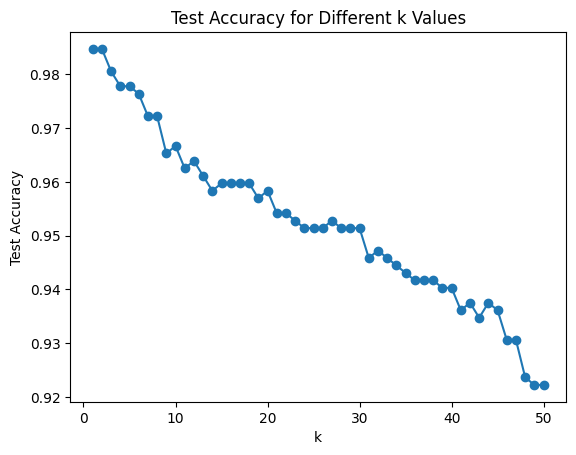

In [16]:
# Split the dataset into training (30%) and test (10%)
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, train_size=0.3, random_state=42)

# Initialize lists to store accuracy values
k_values = list(range(1, 51))
accuracy_values = []

# Loop through k values
for k in k_values:
    # Initialize KNN classifier with current k value
    knn = KNN(k=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predictions on the test data
    predictions = knn.predict(X_test)

    # Calculate accuracy and store it
    acc = np.sum(y_test == predictions) / len(y_test)
    accuracy_values.append(acc)

# Plot the test accuracy for different k values
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Test Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.show()


In the knn classifier as you increase the k in the knn classifer the accuracy of the model decreases. This is because the model is overfitting the data. The model is overfitting the data because it is taking into account too many neighbors. This is causing the model to be too specific to the training data and not general enough to the test data. This is causing the model to be less accurate.